In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [223]:
flname = 'experiment_data (23).csv' # './experiment_data (8).csv'
df = pd.read_csv(flname)
df.head()

,rt,stimulus,response,trial_type,trial_index,plugin_version,time_elapsed,page_duration,stimName,numNoiseDots,true_label,correct,RT,currThreshold,revCount,pdf,likelihood
0,NaN,"<div id=""dot-container"" style=""position: relat...",NaN,html-keyboard-response,0,2.0.0,3202,3185.0,"[""this_tall_F_A_inverted.txt"",""this_tall_F_B_i...",32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1158.0,"<p style=""text-align: center;"">Press a button!...",Inverted,html-button-response,1,2.0.0,4362,NaN,NaN,NaN,Inverted,1.0,1160.0,32.000000,0.0,"[0.0019216182206207117,0.0019752796555699433,0...","[0.005353538262950831,0.005353538262950831,0.0..."
2,NaN,"<div id=""dot-container"" style=""position: relat...",NaN,html-keyboard-response,2,2.0.0,7570,3175.0,"[""this_tall_M_A.txt"",""this_tall_M_B.txt""]",90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1419.0,"<p style=""text-align: center;"">Press a button!...",Upright,html-button-response,3,2.0.0,8990,NaN,NaN,NaN,Upright,1.0,1420.0,89.673104,0.0,"[0.0019,0.002,0.002,0.0021,0.0021,0.0022,0.002...","[0.005984133794231878,0.005984133794231878,0.0..."
4,NaN,"<div id=""dot-container"" style=""position: relat...",NaN,html-keyboard-response,4,2.0.0,12196,3174.0,"[""help_yourself_F_A_inverted.txt"",""help_yourse...",88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df['correct'].value_counts()

correct
1.0    24
0.0     6
Name: count, dtype: int64

In [225]:
df['correct'].mean()

np.float64(0.8)

In [226]:
df.columns

Index(['rt', 'stimulus', 'response', 'trial_type', 'trial_index',
       'plugin_version', 'time_elapsed', 'page_duration', 'stimName',
       'numNoiseDots', 'true_label', 'correct', 'RT', 'currThreshold',
       'revCount', 'pdf', 'likelihood'],
      dtype='object')

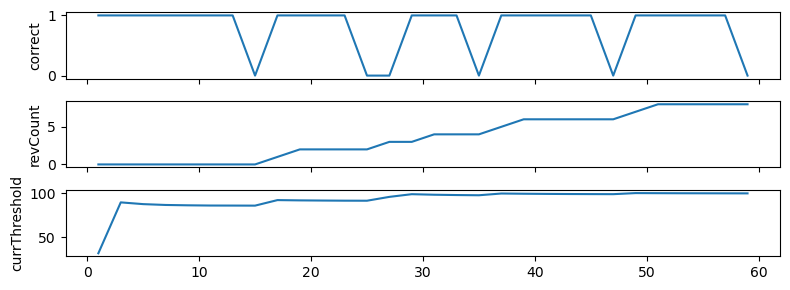

In [227]:
fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(8,3),sharex=True)
sns.lineplot(df['correct'],ax=axs[0])
sns.lineplot(df['revCount'],ax=axs[1])
sns.lineplot(df['currThreshold'],ax=axs[2])
# axs[2].set_ylim(72,78)
plt.tight_layout()

In [228]:
thr = [row for i,row in enumerate(df[['currThreshold']].values) if i%2 ==1 ]
thr

[array([32.]),
 array([89.67310386]),
 array([87.69685157]),
 array([86.74627909]),
 array([86.34931096]),
 array([86.09895729]),
 array([86.05622691]),
 array([85.98730127]),
 array([92.25735147]),
 array([91.9394879]),
 array([91.75244462]),
 array([91.59675643]),
 array([91.55065816]),
 array([95.9176753]),
 array([98.96080784]),
 array([98.34069117]),
 array([97.98732408]),
 array([97.74583209]),
 array([99.72164433]),
 array([99.46354115]),
 array([99.27983252]),
 array([99.14342909]),
 array([99.05415919]),
 array([98.98020792]),
 array([100.1961842]),
 array([100.0999203]),
 array([100.020773]),
 array([99.97543684]),
 array([99.92178436]),
 array([99.88077689])]

- going in the right direction, can be speeded up

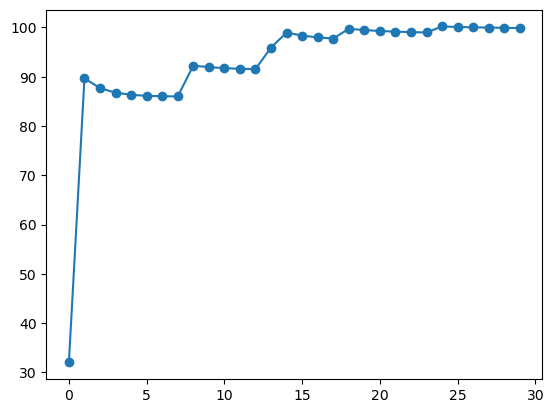

In [229]:
thr = [row for i,row in enumerate(df[['currThreshold']].values) if i%2 ==1 ]
thr = [i[0] for i in thr]
plt.plot(thr,marker='o')

In [230]:
df.columns

Index(['rt', 'stimulus', 'response', 'trial_type', 'trial_index',
       'plugin_version', 'time_elapsed', 'page_duration', 'stimName',
       'numNoiseDots', 'true_label', 'correct', 'RT', 'currThreshold',
       'revCount', 'pdf', 'likelihood'],
      dtype='object')

In [231]:
likelihood = [row for i,row in enumerate(df[['likelihood']].values) if i%2 ==1 ]
likelihood = [eval(list(i)[0]) for i in likelihood]

pdf = [row for i,row in enumerate(df[['pdf']].values) if i%2 ==1 ]
pdf = [eval(list(i)[0]) for i in pdf]
len(pdf),len(likelihood)

(30, 30)

In [232]:
# fig,axs = plt.subplots(figsize=(5,len(likelihood)),nrows=len(likelihood),ncols=1,sharey=True)
# for i in range(len(likelihood)):
#     ax = axs[i]
#     ax.plot(likelihood[i], label = f'trial{i}, thr={thr[i]:.1f}',color = 'k')
#     # ax.set_title(f'trial {i+1}')
# # plt.legend()
# plt.tight_layout()

In [233]:
# fig,axs = plt.subplots(figsize=(5,len(pdf)),nrows=len(pdf),ncols=1,sharey=False)
# for i in range(len(pdf)):
#     ax = axs[i]
#     ax.plot(pdf[i], label = f'trial{i}, thr={thr[i]:.1f}',color = 'k')
#     # ax.set_title(f'trial {i+1}')
# # plt.legend()
# plt.tight_layout()

In [234]:
len(likelihood), len(pdf)

(30, 30)

In [235]:
def decibelise(x):
    return -10*np.log10(x/200)

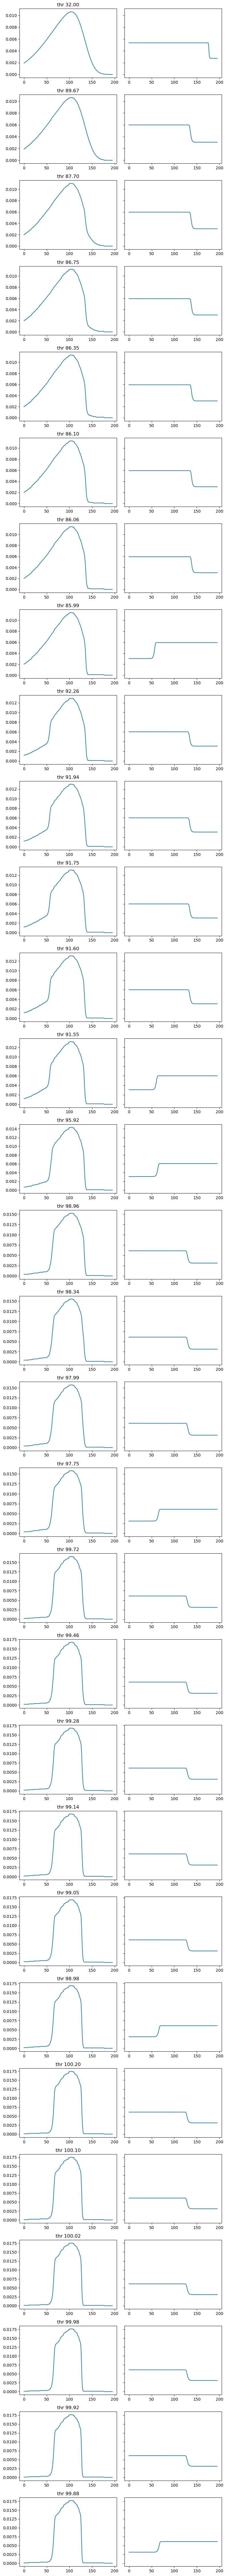

In [236]:
fig,axs = plt.subplots(figsize=(8,len(pdf)*3),nrows=len(pdf),ncols=2,sharey='row')
for i in range(len(pdf)):
    axs[i,0].plot(pdf[i])
    axs[i,1].plot(likelihood[i])
    axs[i,0].set_title(f'thr {thr[i]:.2f}')
    axs[i,0].set_xticks
plt.tight_layout()

In [ ]:
# plt.figure(figsize=(5,5))
# for i in range(len(pdf)):
#     plt.plot(pdf[i], label = f'trial{i}, thr={thr[i]:.1f}',alpha = ((i+1)/len(pdf))*(thr[i]-4)/196,color = 'k')
# plt.legend()

In [78]:
# plt.plot(pdf[3])
# plt.plot(pdf[-1])

In [77]:
# plt.plot(pdf[3])
# plt.plot(pdf[-1])

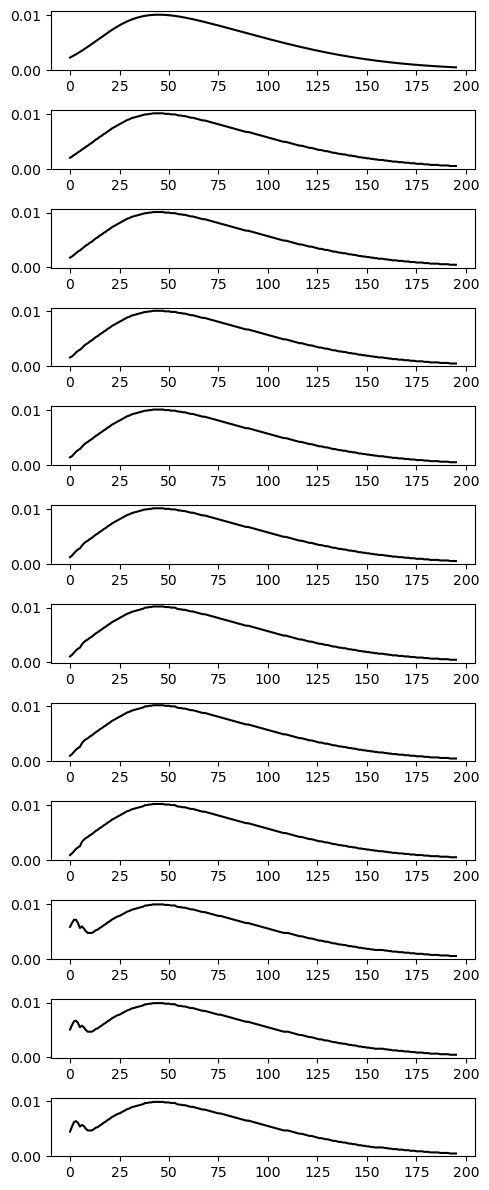

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(figsize=(5,len(pdf)),nrows=len(pdf),ncols=1,sharey=True)
for i in range(len(pdf)):
    ax = axs[i]
    ax.plot(pdf[i], label = f'trial{i}, thr={thr[i]:.1f}',color = 'k')#alpha = ((i+1)/len(pdf))*(thr[i]-4)/196,
    # ax.set_title(f'trial {i+1}')
# plt.legend()
plt.tight_layout()

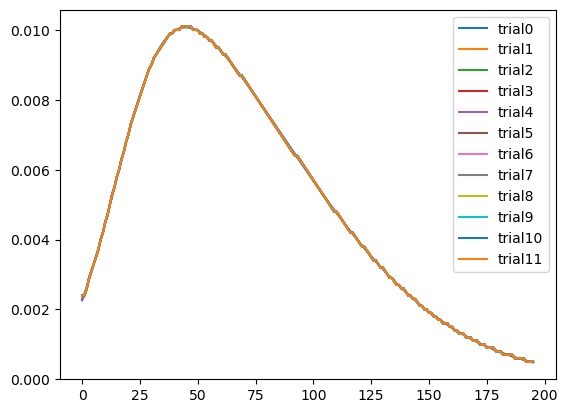

In [540]:
import matplotlib.pyplot as plt
for i in range(len(pdf)):
    plt.plot(pdf[i], label = f'trial{i}')

plt.legend()

<Axes: >

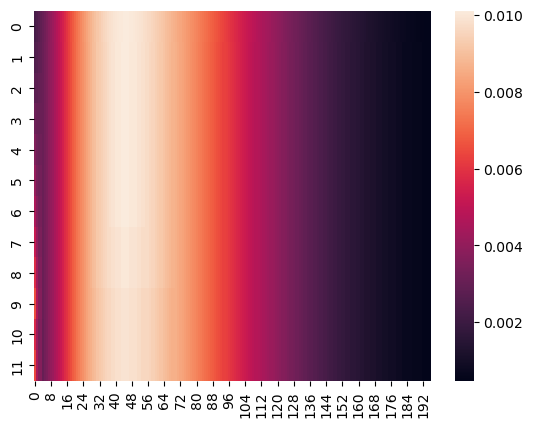

In [530]:
sns.heatmap(pdf)

In [453]:
import math
import numpy as np

In [454]:
# flat prior
prior  = np.zeros((np.arange(4,200).shape[0],))
prior = 1/prior.shape[0]
prior

0.00510204081632653

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_45144/455207209.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)


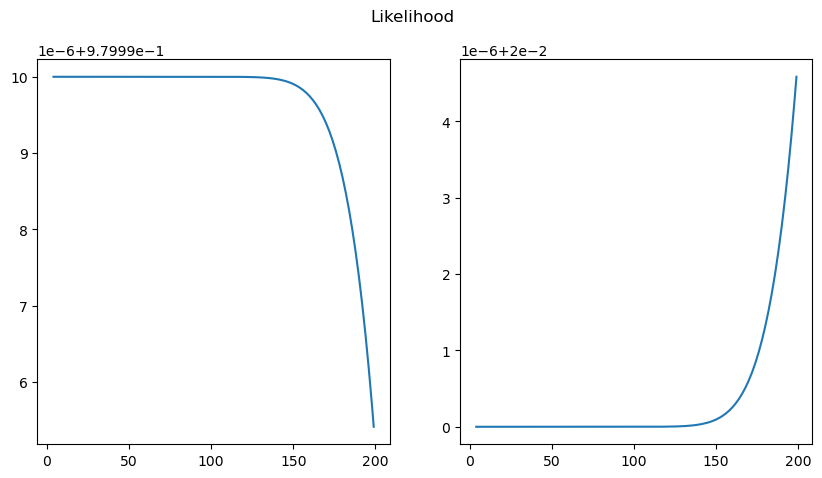

In [455]:
# # test weibull to ID the 75% threshold
# p_trial_right = []
# p_trial_wrong = []
# for alpha_unnorm in np.arange(4,200):
#     alpha = (alpha_unnorm-4)/196 #49
#     gamma = .5
#     lmbda = .02
#     # alpha = (49-4)/196 #49
#     beta = 0.23 #-0.00178
#     p_target = .75
#     x = 50  # ndots on a trial
#     preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
#     p_trial_right.append(preal)
#     p_trial_wrong.append(1-preal)

# fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
# plt.suptitle('Likelihood')
# axs[0].plot(np.arange(4,200), p_trial_right) # correct resp
# axs[1].plot(np.arange(4,200), p_trial_wrong) # wrong resp

In [456]:
p_trial_right

[np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(

In [129]:
prior_range = [40,80]
p_trial_right = np.zeros(((prior_range[1]-prior_range[0]),(prior_range[1]-prior_range[0]+2)),dtype=float)
p_trial_wrong = np.zeros(((prior_range[1]-prior_range[0]),(prior_range[1]-prior_range[0]+2)),dtype=float)
for i,x_unnorm in enumerate(np.arange(prior_range[0],prior_range[1])):
    for j,alpha_unnorm in enumerate(np.arange(prior_range[0],prior_range[1]+2)):
        alpha = (alpha_unnorm-4)/(prior_range[1]-prior_range[0]) #49
        gamma = .5
        lmbda = .02
        # alpha = (49-4)/196 #49
        beta = -0.23 #-0.00178
        # if i == 0:
        #     x = 50  # ndots on a trial
        # else:
        #     x = np.nanmean(prior_all[-1])
        x = (x_unnorm-4)/196 #49
        preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
        # p_trial_right.append(preal)
        # p_trial_wrong.append(1-preal)
        p_trial_right[i,j] = preal
        p_trial_wrong[i,j] = 1-preal

In [127]:
alpha_unnorm

np.int64(81)

In [130]:
x_unnorm

np.int64(79)

Text(0.5, 0, 'alpha')

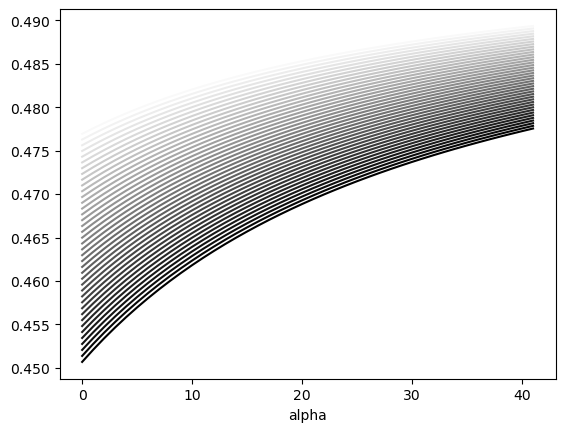

In [152]:
for i in range(p_trial_right.shape[0]):
    plt.plot(p_trial_right[i,:].T, alpha = (i+1)/p_trial_right.shape[0], color = 'k')
plt.xlabel('alpha')

Text(0.5, 0, 'x')

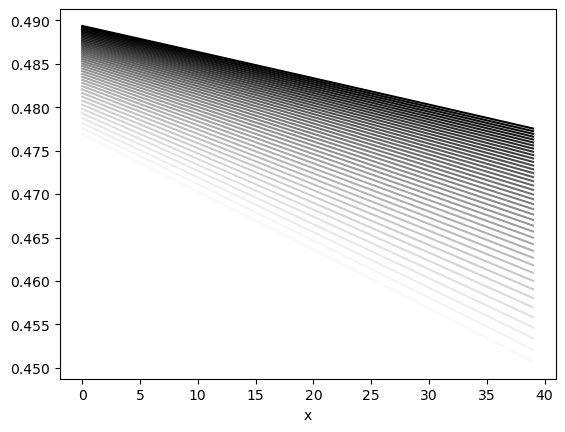

In [153]:
for i in range(p_trial_right.shape[1]):
    plt.plot(p_trial_right[:,i], alpha = (i+1)/p_trial_right.shape[1], color = 'k')
plt.xlabel('x')

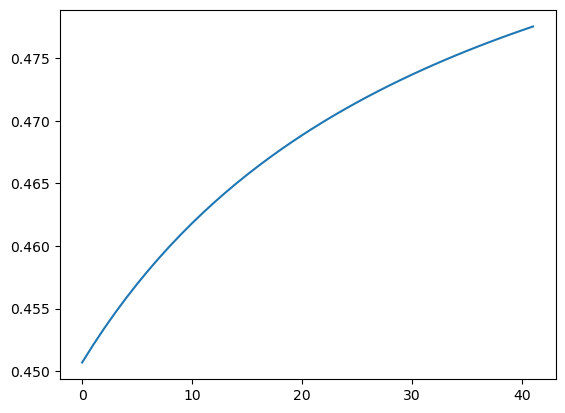

In [132]:
plt.plot(p_trial_right[39,:])

([<matplotlib.axis.YTick at 0x168c279d0>,
 [Text(0, 0, '40'),
  Text(0, 1, '41'),
  Text(0, 2, '42'),
  Text(0, 3, '43'),
  Text(0, 4, '44'),
  Text(0, 5, '45'),
  Text(0, 6, '46'),
  Text(0, 7, '47'),
  Text(0, 8, '48'),
  Text(0, 9, '49'),
  Text(0, 10, '50'),
  Text(0, 11, '51'),
  Text(0, 12, '52'),
  Text(0, 13, '53'),
  Text(0, 14, '54'),
  Text(0, 15, '55'),
  Text(0, 16, '56'),
  Text(0, 17, '57'),
  Text(0, 18, '58'),
  Text(0, 19, '59'),
  Text(0, 20, '60'),
  Text(0, 21, '61'),
  Text(0, 22, '62'),
  Text(0, 23, '63'),
  Text(0, 24, '64'),
  Text(0, 25, '65'),
  Text(0, 26, '66'),
  Text(0, 27, '67'),
  Text(0, 28, '68'),
  Text(0, 29, '69'),
  Text(0, 30, '70'),
  Text(0, 31, '71'),
  Text(0, 32, '72'),
  Text(0, 33, '73'),
  Text(0, 34, '74'),
  Text(0, 35, '75'),
  Text(0, 36, '76'),
  Text(0, 37, '77'),
  Text(0, 38, '78'),
  Text(0, 39, '79')])

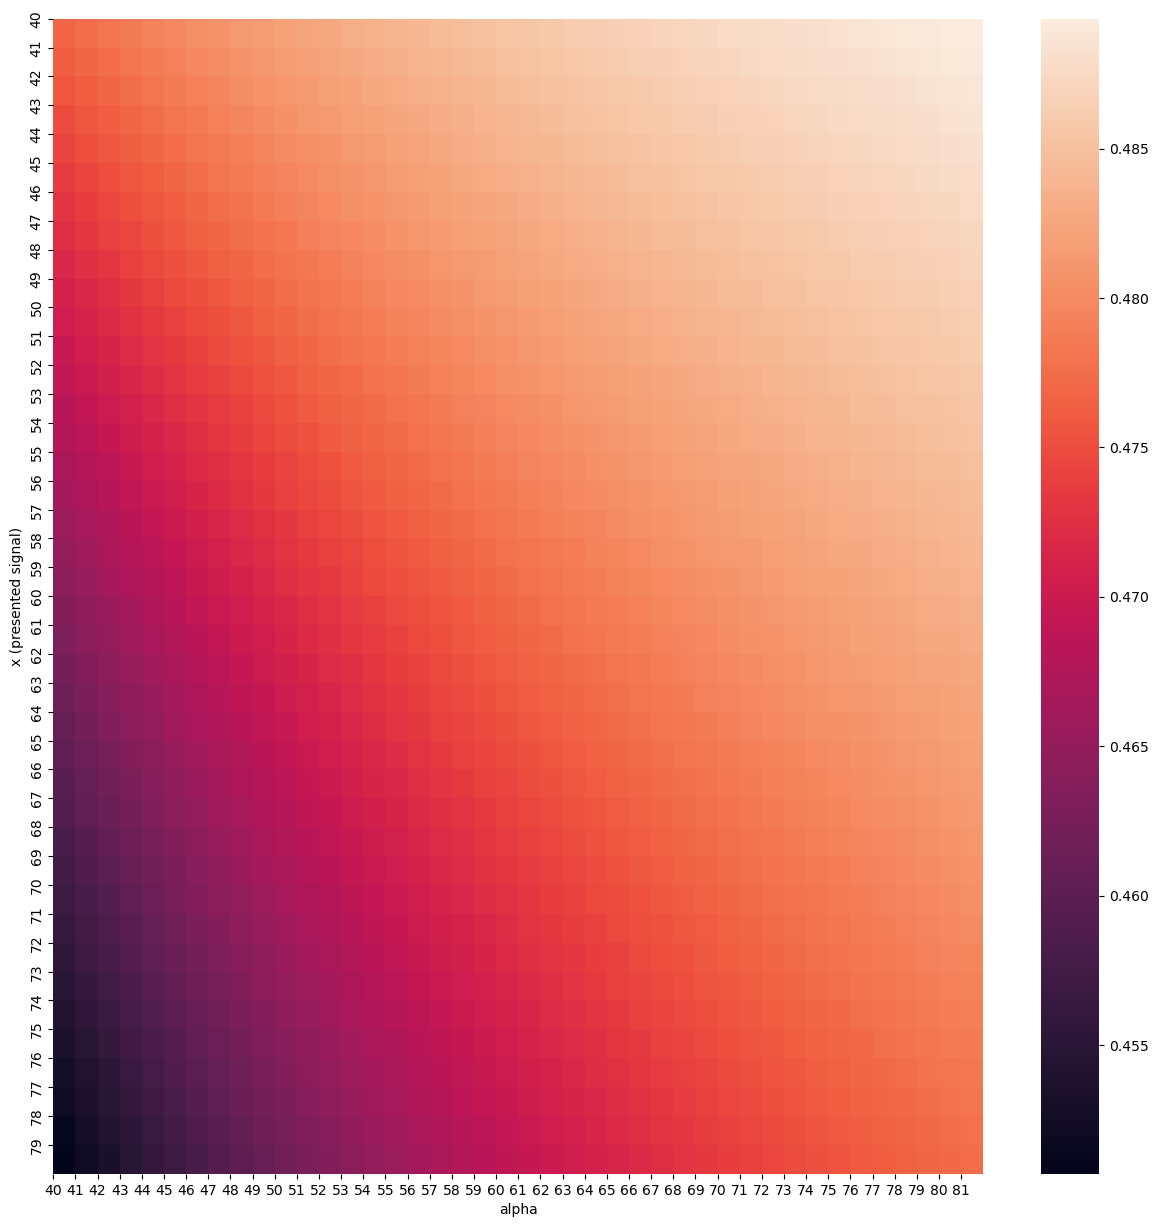

In [151]:
plt.figure(figsize=(15,15))
sns.heatmap(p_trial_right)
plt.xlabel('alpha')
plt.ylabel('x (presented signal)')
plt.xticks(np.arange(0,42), np.arange(prior_range[0],prior_range[1]+2))
plt.yticks(np.arange(0,40), np.arange(prior_range[0],prior_range[1]))

In [158]:
.0246*.5025

0.0123615

In [159]:
.0252*.501

0.0126252

In [172]:
np.arange(prior_range[0],prior_range[1])

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79])

In [183]:
def normalize_vals(x):
    return (x-4)/196 # assuming 4 and 200 are the bounds

In [184]:
avg = 50
std = 10
avg = normalize_vals(avg)
std_dev = normalize_vals(std)
priorx = np.linspace(normalize_vals(prior_range[0]),normalize_vals(prior_range[1]), prior_range[1]-prior_range[0])
# prior += 1/prior.shape[0]
# Define the prior
priorx, avg, std_dev

(array([0.18367347, 0.18890633, 0.19413919, 0.19937206, 0.20460492,
        0.20983778, 0.21507064, 0.22030351, 0.22553637, 0.23076923,
        0.23600209, 0.24123496, 0.24646782, 0.25170068, 0.25693354,
        0.26216641, 0.26739927, 0.27263213, 0.27786499, 0.28309785,
        0.28833072, 0.29356358, 0.29879644, 0.3040293 , 0.30926217,
        0.31449503, 0.31972789, 0.32496075, 0.33019362, 0.33542648,
        0.34065934, 0.3458922 , 0.35112507, 0.35635793, 0.36159079,
        0.36682365, 0.37205651, 0.37728938, 0.38252224, 0.3877551 ]),
 0.23469387755102042,
 0.030612244897959183)

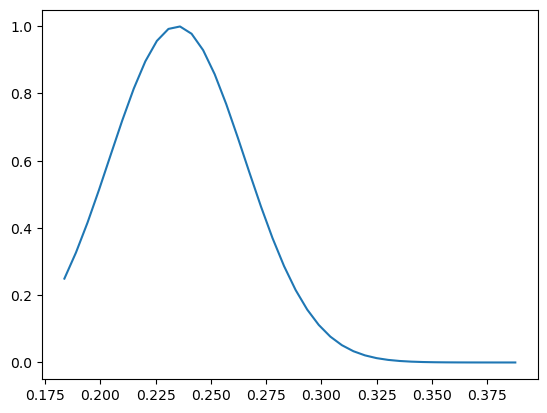

In [185]:
prior = np.exp(-0.5 * ((priorx - avg) / std_dev) ** 2)  # Gaussian formula
plt.plot(priorx,prior)

In [251]:
preal

np.float64(nan)

In [252]:
betaAdjusted

0.115

In [254]:
preal

np.float64(nan)

In [429]:
posterior

array([0.02527328, 0.02525087, 0.02522956, 0.02520927, 0.02518992,
       0.02517146, 0.02515382, 0.02513695, 0.0251208 , 0.02510533,
       0.02509049, 0.02507625, 0.02506256, 0.02504941, 0.02503676,
       0.02502457, 0.02501283, 0.02500151, 0.02499059, 0.02498005,
       0.02496987, 0.02496003, 0.02495051, 0.0249413 , 0.02493239,
       0.02492375, 0.02491538, 0.02490727, 0.0248994 , 0.02489176,
       0.02488434, 0.02487714, 0.02487014, 0.02486334, 0.02485672,
       0.02485028, 0.02484402, 0.02483792, 0.02483198, 0.02482619])

In [431]:
accuracy

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.])

In [434]:
likelihood

[np.float64(0.9799998859663802),
 np.float64(0.9799998277871445),
 np.float64(0.9799997455072269),
 np.float64(0.9799996313727833),
 np.float64(0.9799994758522291),
 np.float64(0.9799992674062754),
 np.float64(0.9799989922602589),
 np.float64(0.9799986341833411),
 np.float64(0.9799981742789435),
 np.float64(0.9799975907904512),
 np.float64(0.9799968589257766),
 np.float64(0.979995950703854),
 np.float64(0.9799948348255729),
 np.float64(0.9799934765710604),
 np.float64(0.979991837724639),
 np.float64(0.979989876528206),
 np.float64(0.9799875476632407),
 np.float64(0.9799848022611499),
 np.float64(0.9799815879412186),
 np.float64(0.9799778488750432),
 np.float64(0.9799735258760045),
 np.float64(0.9799685565120639),
 np.float64(0.9799628752399687),
 np.float64(0.9799564135587896),
 np.float64(0.9799491001806238),
 np.float64(0.9799408612162356),
 np.float64(0.9799316203733961),
 np.float64(0.9799212991657082),
 np.float64(0.9799098171297547),
 np.float64(0.9798970920484883),
 np.float64(0

trial 0 0.23469387755102042
corr? 1.0
trial 1 0.28787684348045506
wrong? 0.0
trial 2 0.2884469766815197
corr? 1.0
trial 3 0.2879282815170146
wrong? 0.0
trial 4 0.28849822644035167
wrong? 0.0
trial 5 0.2890665849919675
corr? 1.0
trial 6 0.2885495636195417
wrong? 0.0
trial 7 0.2891177271840806
wrong? 0.0
trial 8 0.2896842332447756
wrong? 0.0
trial 9 0.29024901738406106
corr? 1.0


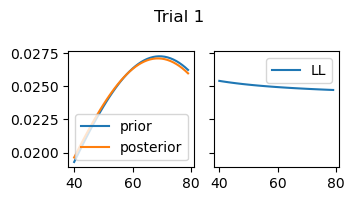

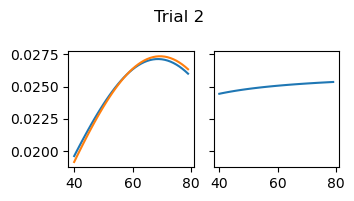

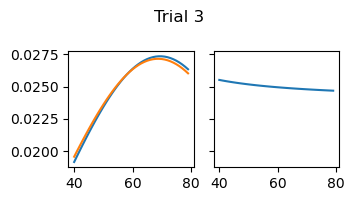

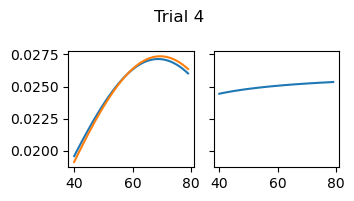

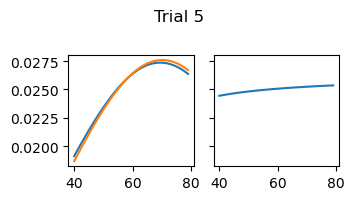

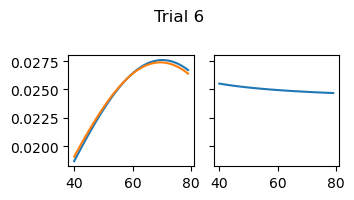

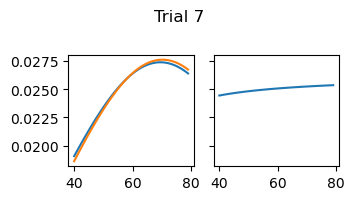

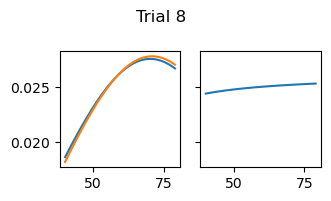

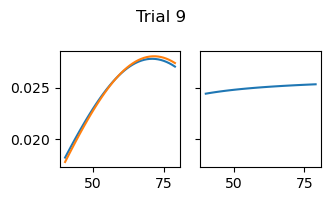

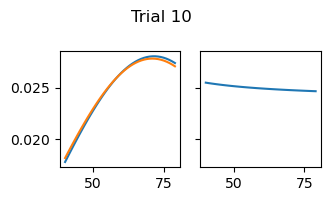

In [466]:
prior_range = [40,80]
prior_all = []
likelihood_all = []
for i in range(10):#(Ntrials):
    currTrial_acc = accuracy[i]

    p_trial_right = []
    p_trial_wrong = []

    if i == 0:
        # Gaussian prior
        avg = 70
        std = 40
        avg = normalize_vals(avg)
        std_dev = normalize_vals(std)
        priorx = np.linspace(normalize_vals(prior_range[0]),normalize_vals(prior_range[1]), prior_range[1]-prior_range[0])
        # prior += 1/prior.shape[0]
        
        prior = np.exp(-0.5 * ((priorx - avg) / std_dev) ** 2)  # Gaussian formula
        prior = prior/(prior.sum())

        # flat prior
        # prior = np.zeros((np.arange(prior_range[0],prior_range[1]).shape[0],))
        # prior += 1/prior.shape[0]
        # prior_all.append(prior) 
    else:
        prior = prior_all[-1]

    for alpha_unnorm in np.arange(prior_range[0],prior_range[1]):
        alpha = (alpha_unnorm-4)/(prior_range[1]-prior_range[0]) #49
        gamma = .5
        lmbda = .02
        # alpha = (49-4)/196 #49
        # beta = 1 #-0.00178
        # beta = -0.23 #-0.00178
        beta = 0.23
        if i == 0:
            x = 50  # ndots on a trial
            
        else:
            # x = np.nanmean(prior_all[-1])

            # Calculate weighted sum
            weighted_sum = sum(alpha * prior[i] for i, alpha in enumerate(np.arange(prior_range[0],prior_range[1])))

            # Calculate normalization factor
            normalization_factor = sum(prior)

            # Calculate mean
            mean_alpha = weighted_sum / normalization_factor
            x = mean_alpha

        x = (x-4)/196 #49

        if alpha_unnorm == prior_range[0]:
            print('trial',i, x)
        # print(x)
        
        # betaAdjusted = beta * 0.5
        preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
        # preal = gamma + (1-gamma-lmbda)*(1-np.exp(-10)**(beta*(x-alpha)))
        # preal = preal*10
        # smoothingFactor = 10
        # preal = preal**smoothingFactor
        # if np.isnan(preal):
        #     break

        p_trial_right.append(preal)#preal)
        p_trial_wrong.append((1-preal))#1-preal)
        # p_trial_right.append(preal**smoothingFactor)#preal)
        # p_trial_wrong.append((1-preal)**smoothingFactor)#1-preal)

    if int(currTrial_acc) == 1:
        print('corr?',currTrial_acc)
        likelihood = p_trial_right
    else:
        print('wrong?',currTrial_acc)
        likelihood = p_trial_wrong
    # likelihood = p_trial_right if currTrial_acc == 1 else p_trial_wrong
    likelihood = likelihood/sum(likelihood)
    # likelihood = -np.log(likelihood)
    # likelihood = [1000*i for i in likelihood]
    posterior = np.multiply(prior,likelihood)
    if np.isnan(posterior[0]):
            raise Exception('out')
    posterior = posterior/(posterior.sum())
    likelihood_all.append(likelihood)
    prior_all.append(posterior)

    # fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(5,2))#,sharey=True)
    # axs[0].plot(np.arange(prior_range[0],prior_range[1]),prior)
    # axs[1].plot(np.arange(prior_range[0],prior_range[1]),likelihood)
    # axs[2].plot(np.arange(prior_range[0],prior_range[1]),posterior)
    # plt.tight_layout()

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(3.5,2),sharey=True)
    axs[0].plot(np.arange(prior_range[0],prior_range[1]),prior, label='prior')
    axs[0].plot(np.arange(prior_range[0],prior_range[1]),posterior, label='posterior')
    axs[1].plot(np.arange(prior_range[0],prior_range[1]),likelihood, label = 'LL')
    # axs[0].set_ylim(0.023,0.027)
    if i == 0:
        axs[0].legend()
        axs[1].legend()
    fig.suptitle(f'Trial {i+1}')
    plt.tight_layout()


prior_all = np.array(prior_all)
# prior_all.shape


In [427]:
prior_range

[40, 80]

In [399]:
currTrial_acc

np.float64(1.0)

In [400]:
preal

np.float64(5.1362175555105685)

In [378]:
prior_all[3].mean(), prior_all[-2].mean()

(np.float64(0.025000000000000005), np.float64(0.025))

In [383]:
np.arange(prior_range[0],prior_range[1])[np.argmax(prior_all[3])]

np.int64(65)

In [384]:
np.arange(prior_range[0],prior_range[1])[np.argmax(prior_all[-2])]

np.int64(79)

np.int64(65)

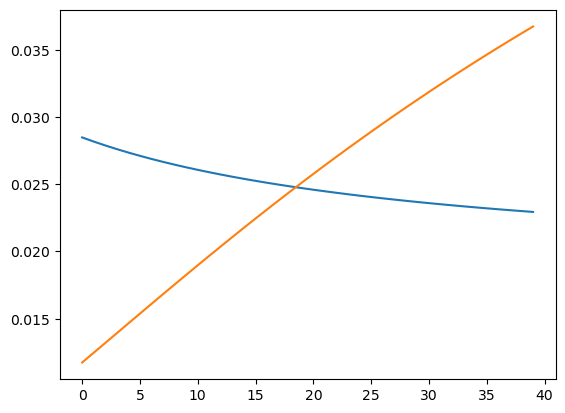

In [369]:
plt.plot(prior_all[3])
plt.plot(prior_all[-2])

In [7]:
# test weibull to ID the 75% threshold
gamma = .5
lmbda = .02
alpha = (49-4)/196 #49
beta = 0.23 #-0.00178
p_target = .75
x = 1-((20-4)/196)
preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
preal

np.float64(0.7887108602794333)

100